## Project-2 - Common Core State Standards

### Data acquisition

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

# Load your dataset
df = pd.read_csv('C:/Users/venka/OneDrive/Documents/MS Documents/Yeshiva/Program documents/Summer 2024/ML Internship/ccss.csv')

ModuleNotFoundError: No module named 'pandas'

In [2]:
df.head()

,id,content_type,category_id,category_name,grade_id,grade_name,item,description
0,CCSS.ELA-LITERACY.L.K.1,ELA-LITERACY,L,Language,K,Kindergarten,1,Demonstrate command of the conventions of stan...
1,CCSS.ELA-LITERACY.L.K.1.a,ELA-LITERACY,L,Language,K,Kindergarten,1a,Print many upper- and lowercase letters.
2,CCSS.ELA-LITERACY.L.K.1.b,ELA-LITERACY,L,Language,K,Kindergarten,1b,Use frequently occurring nouns and verbs.
3,CCSS.ELA-LITERACY.L.K.1.c,ELA-LITERACY,L,Language,K,Kindergarten,1c,Form regular plural nouns orally by adding /s/...
4,CCSS.ELA-LITERACY.L.K.1.d,ELA-LITERACY,L,Language,K,Kindergarten,1d,Understand and use question words (interrogati...


In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1554 non-null   object
 1   content_type   1554 non-null   object
 2   category_id    1554 non-null   object
 3   category_name  1554 non-null   object
 4   grade_id       1522 non-null   object
 5   grade_name     1522 non-null   object
 6   item           1554 non-null   object
 7   description    1554 non-null   object
dtypes: object(8)
memory usage: 97.3+ KB
None


In [4]:
df.describe()

,id,content_type,category_id,category_name,grade_id,grade_name,item,description
count,1554,1554,1554,1554,1522,1522,1554,1554
unique,1554,2,45,45,17,17,126,1325
top,CCSS.ELA-LITERACY.L.K.1,ELA-LITERACY,L,Language,3,Grade 3,4,Demonstrate command of the conventions of stan...
freq,1,1045,253,253,129,129,74,12


### Exploratory Data Analysis

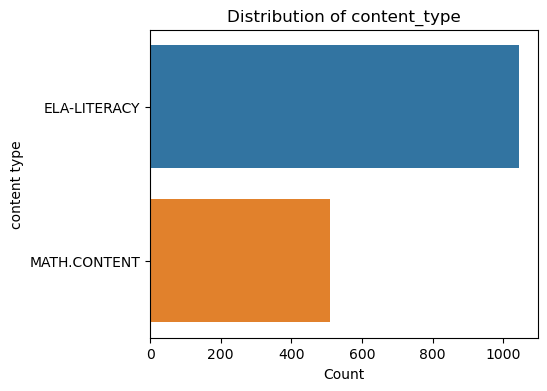

In [5]:
# Distribution of content
plt.figure(figsize=(5, 4))
sns.countplot(y='content_type', data=df, order=df['content_type'].value_counts().index)
plt.title('Distribution of content_type')
plt.xlabel('Count')
plt.ylabel('content type')
plt.show()

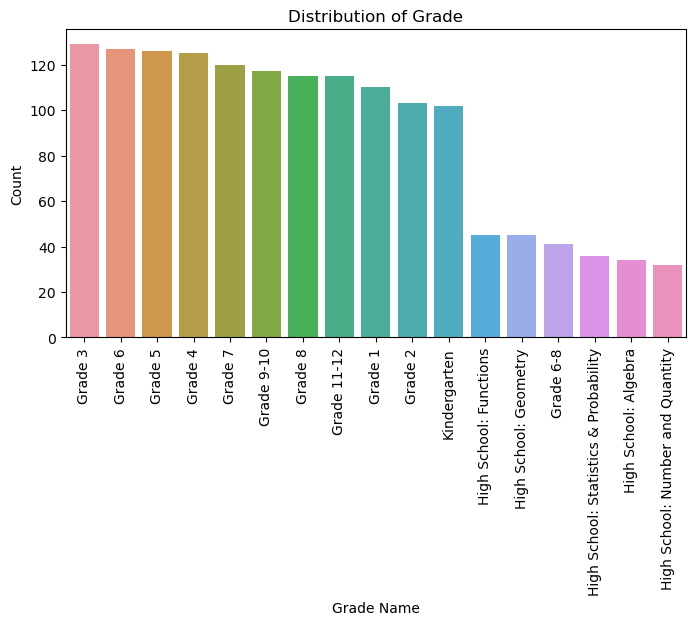

In [6]:
#Grade distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='grade_name', data=df, order=df['grade_name'].value_counts().index)
plt.title('Distribution of Grade')
plt.xlabel('Grade Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

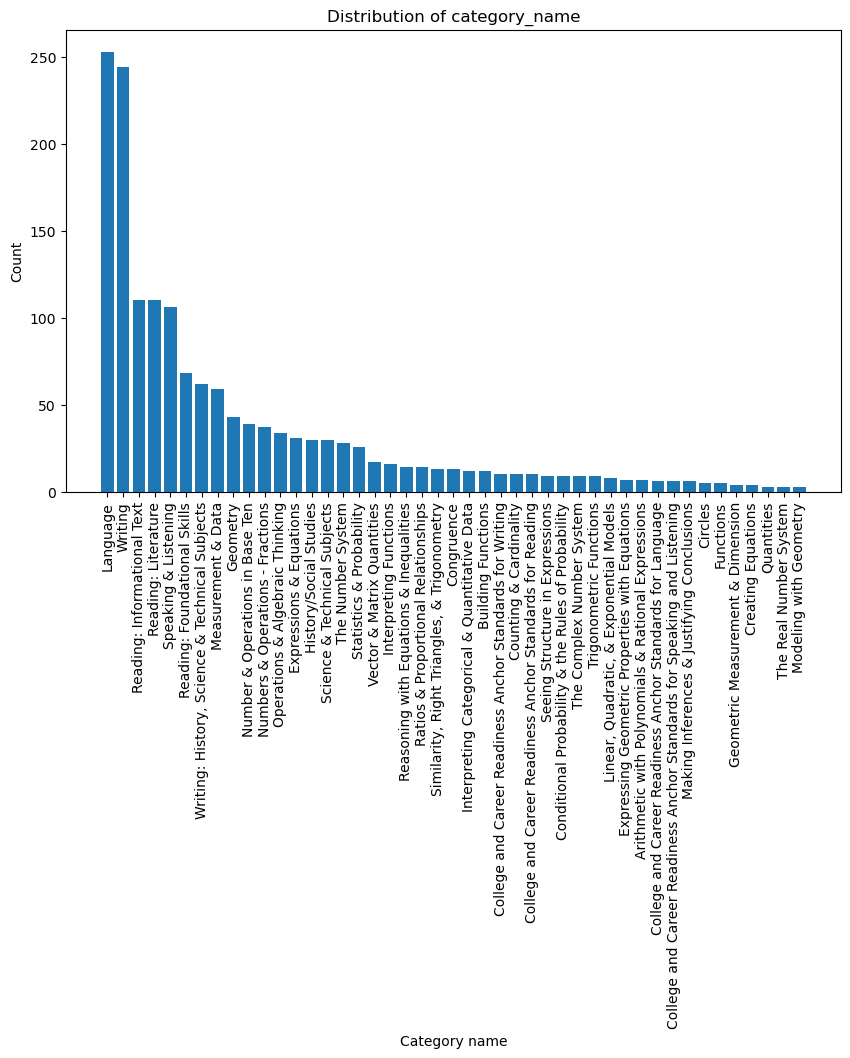

In [7]:
# Distribution of category_id using matplotlib's bar plot
plt.figure(figsize=(10, 6))
category_counts = df['category_name'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of category_name')
plt.xlabel('Category name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

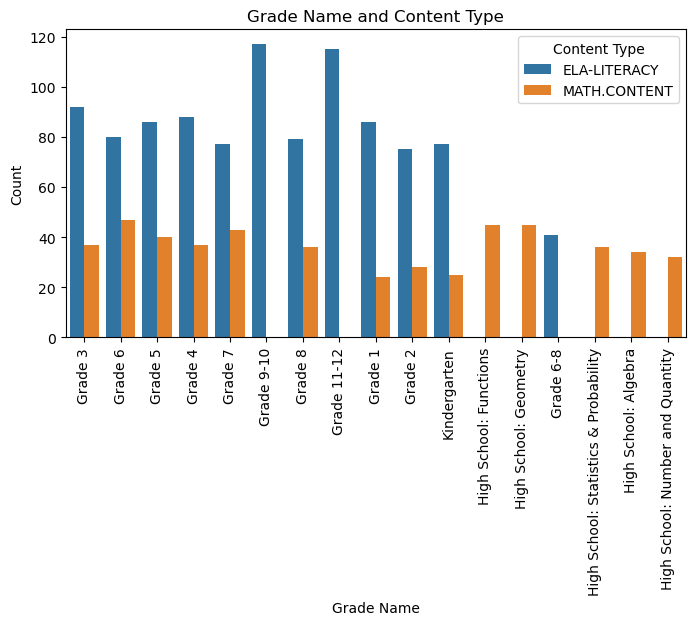

In [8]:
# Bivariate Analysis: grade_name and content_type
plt.figure(figsize=(8, 4))
sns.countplot(x='grade_name', hue='content_type', data=df, order=df['grade_name'].value_counts().index)
plt.title('Grade Name and Content Type')
plt.xlabel('Grade Name')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.xticks(rotation=90)
plt.show()

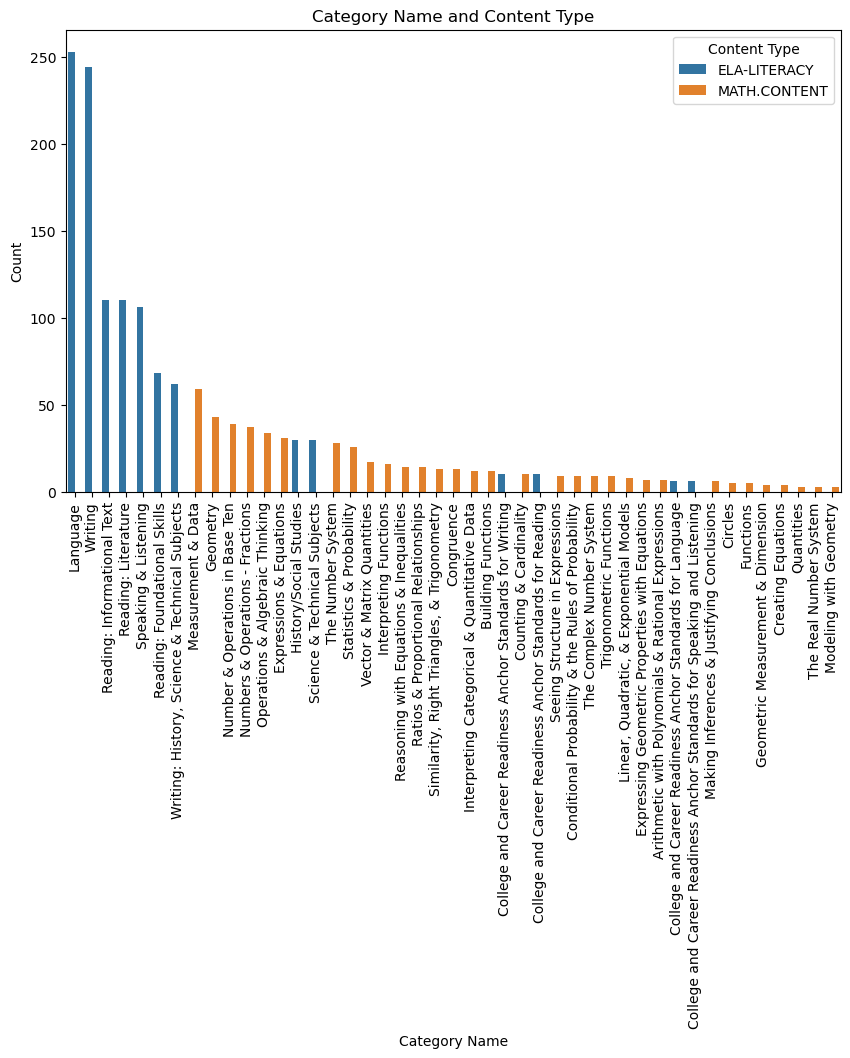

In [9]:
# Bivariate Analysis: category_name and content_type
plt.figure(figsize=(10, 6))
sns.countplot(x='category_name', hue='content_type', data=df, order=df['category_name'].value_counts().index)
plt.title('Category Name and Content Type')
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing 

In [14]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Download NLTK resources 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define text preprocessing function
def preprocess_text(text):
    # Lowercase and remove special characters\whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)
    text = text.lower()
    text = text.strip()
    # Tokenize document
    tokens = word_tokenize(text)
    # Filter stopwords out of document
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize tokens with proper POS tagging
    lemmatized_tokens = []
    for token in filtered_tokens:
        # Default POS tag is 'n' (noun); adjust POS tagging as needed
        pos_tag = nltk.pos_tag([token])[0][1][0].upper()
        pos_tag = pos_tag if pos_tag in ['A', 'N', 'V'] else 'N'  # Adjust for adjective, noun, or verb
        lemmatized_token = lemmatizer.lemmatize(token, pos=pos_tag.lower())
        lemmatized_tokens.append(lemmatized_token)
    # Re-create document from lemmatized tokens
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# Apply preprocessing to the 'description' column
df['description_processed'] = df['description'].apply(preprocess_text)

df[['description', 'description_processed']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,description,description_processed
0,Demonstrate command of the conventions of stan...,demonstrate command convention standard englis...
1,Print many upper- and lowercase letters.,print many upper lowercase letter
2,Use frequently occurring nouns and verbs.,use frequently occur noun verb
3,Form regular plural nouns orally by adding /s/...,form regular plural noun orally add e eg dog d...
4,Understand and use question words (interrogati...,understand use question word interrogative eg
...,...,...
1549,(+) Weigh the possible outcomes of a decision ...,weigh possible outcome decision assign probabi...
1550,Find the expected payoff for a game of chance....,find expect payoff game chance example find ex...
1551,Evaluate and compare strategies on the basis o...,evaluate compare strategy basis expect value e...
1552,(+) Use probabilities to make fair decisions (...,use probability make fair decision eg draw lot...


In [4]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit TF-IDF Vectorizer on the processed descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_processed'])


NameError: name 'TfidfVectorizer' is not defined

In [15]:
# Function to calculate cosine similarity
def calculate_cosine_similarity(query_description, tfidf_matrix):
    # Preprocess query description
    query_processed = preprocess_text(query_description)
    # Transform query description to TF-IDF vector
    query_tfidf = tfidf_vectorizer.transform([query_processed])
    # Calculate cosine similarity between query and all descriptions
    cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()
    # Sort indices by descending cosine similarity values
    related_docs_indices = cosine_similarities.argsort()[::-1]
    # Return sorted indices (IDs)
    return df.iloc[related_docs_indices]['id'].values

# Example query description
query_description = "Identify the main idea of a story and explain how it is supported by key details."

# Calculate closest IDs based on cosine similarity
closest_ids = calculate_cosine_similarity(query_description, tfidf_matrix)

print("Closest IDs based on cosine similarity to the query description:")
print(closest_ids)

Closest IDs based on cosine similarity to the query description:
['CCSS.MATH.CONTENT.7.SP.C.7' 'CCSS.ELA-LITERACY.RL.4.9'
 'CCSS.ELA-LITERACY.L.2.5' ... 'CCSS.MATH.CONTENT.K.CC.A.2'
 'CCSS.MATH.CONTENT.K.CC.A.3' 'CCSS.ELA-LITERACY.WHST.6-8.6']


In [16]:
len(closest_ids)

1554